## VRP Project

### Importing all the necessary libraries
#### in case you don't have any library you can use (pip install {library_name}) to install library

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Load and Prepare Data

In [2]:
Nifty_rev=pd.read_csv('Nifty 50 Historical Data.csv', parse_dates=['Date'])
Vix_rev=pd.read_csv('India VIX Historical Data.csv', parse_dates=['Date'])

In [3]:
Nifty=Nifty_rev.iloc[::-1]
Vix=Vix_rev.iloc[::-1]

In [4]:
# Nifty.replace(',':' ')
Nifty['Open'] = Nifty['Open'].str.replace(',', '').astype(float)
Nifty['Close'] = Nifty['Price'].str.replace(',', '').astype(float)
Nifty['High'] = Nifty['High'].str.replace(',', '').astype(float)
Nifty['Low'] = Nifty['Low'].str.replace(',', '').astype(float)
Nifty.drop('Price',axis=1)

,Date,Open,High,Low,Vol.,Change %,Close
2567,2015-01-01,8272.80,8294.70,8248.75,56.56M,0.02%,8284.00
2566,2015-01-02,8288.70,8410.60,8288.70,101.89M,1.35%,8395.45
2565,2015-01-05,8407.95,8445.60,8363.90,118.16M,-0.20%,8378.40
2564,2015-01-06,8325.30,8327.85,8111.35,172.80M,-3.00%,8127.35
2563,2015-01-07,8118.65,8151.20,8065.45,164.08M,-0.31%,8102.10
...,...,...,...,...,...,...,...
4,2025-05-09,23935.75,24164.25,23935.75,335.55M,-1.10%,24008.00
3,2025-05-12,24420.10,24944.80,24378.85,368.71M,3.82%,24924.70
2,2025-05-13,24864.05,24973.80,24547.50,422.98M,-1.39%,24578.35
1,2025-05-14,24613.80,24767.55,24535.55,345.49M,0.36%,24666.90


In [5]:
Vix.tail()

,Date,Price,Open,High,Low,Vol.,Change %
4,2025-05-09,21.6325,21.0075,22.7475,21.0025,NaN,2.98%
3,2025-05-12,18.3925,21.6325,21.6325,17.2075,NaN,-14.98%
2,2025-05-13,18.2000,18.3925,18.9025,17.8925,NaN,-1.05%
1,2025-05-14,17.2250,18.2000,19.2425,17.0825,NaN,-5.36%
0,2025-05-15,16.8925,17.2250,17.6725,16.7200,NaN,-1.93%


In [6]:
Nifty.set_index('Date',inplace=True)
Vix.set_index('Date',inplace=True)
Vix.rename(columns={'Price':'Close'},inplace=True)

C:\Users\Roshan\AppData\Local\Temp\ipykernel_19460\3154589854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vix.rename(columns={'Price':'Close'},inplace=True)


In [7]:
Vix.tail()

,Close,Open,High,Low,Vol.,Change %
Date,,,,,,
2025-05-09,21.6325,21.0075,22.7475,21.0025,NaN,2.98%
2025-05-12,18.3925,21.6325,21.6325,17.2075,NaN,-14.98%
2025-05-13,18.2000,18.3925,18.9025,17.8925,NaN,-1.05%
2025-05-14,17.2250,18.2000,19.2425,17.0825,NaN,-5.36%
2025-05-15,16.8925,17.2250,17.6725,16.7200,NaN,-1.93%


## 2. Define VRP Calculation Function

In [8]:
def VRP(x,y,d):
    # Calculate log returns of Nifty
    log_returns = np.log(x / x.shift(1))
    
    # Calculate log returns of Nifty
    Realized_Variance=log_returns.rolling(d).var()

    # Compute implied variance from VIX (annualized to d-day scale)
    Implied_Variance=((y/100)**2).shift(d)*(d/252)
    
    return Realized_Variance-Implied_Variance

In [10]:
start=datetime.datetime.now()
VRP=VRP(Nifty['Close'],Vix['Close'],30)
print(datetime.datetime.now()-start)
print(VRP)

0:00:00
Date
2015-01-01         NaN
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
                ...   
2025-05-09   -0.001748
2025-05-12   -0.002059
2025-05-13   -0.002030
2025-05-14   -0.001979
2025-05-15   -0.001919
Name: Close, Length: 2568, dtype: float64


## 3. Plot VRP and Explore Behavior

Text(0, 0.5, 'VRP')

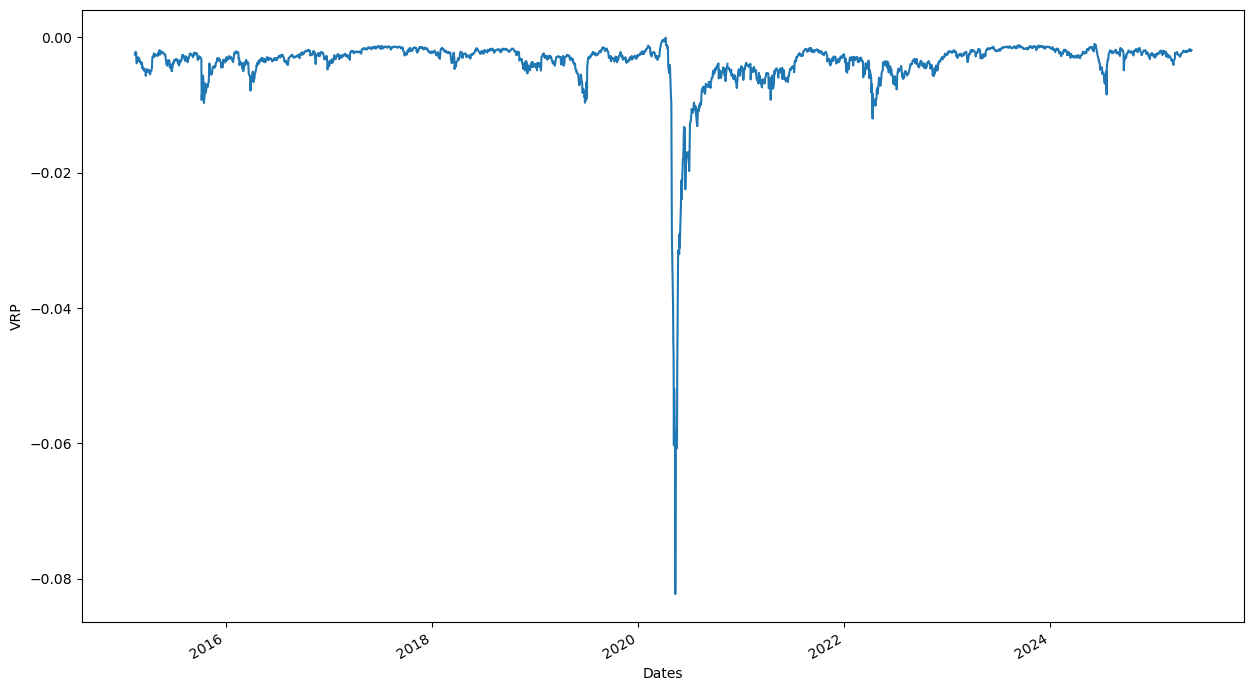

In [12]:
VRP.plot(figsize=[15,9])
plt.xlabel('Dates')
plt.ylabel('VRP')

<Axes: xlabel='Date'>

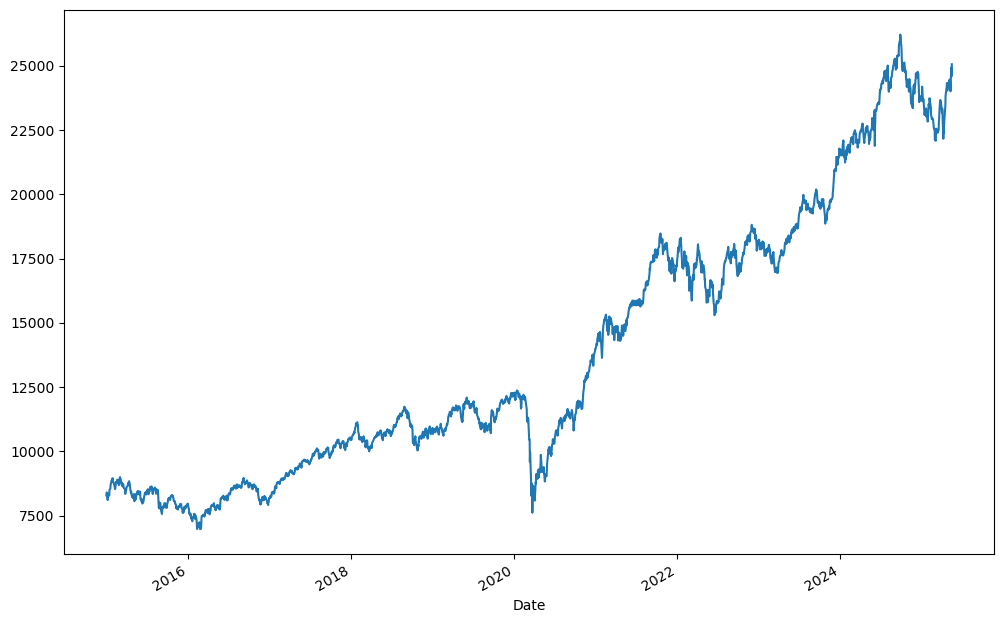

In [13]:
Nifty['Close'].plot(figsize=[12,8])
# Vix['Close'].plot(figsize=[15,10])

<Axes: xlabel='Date'>

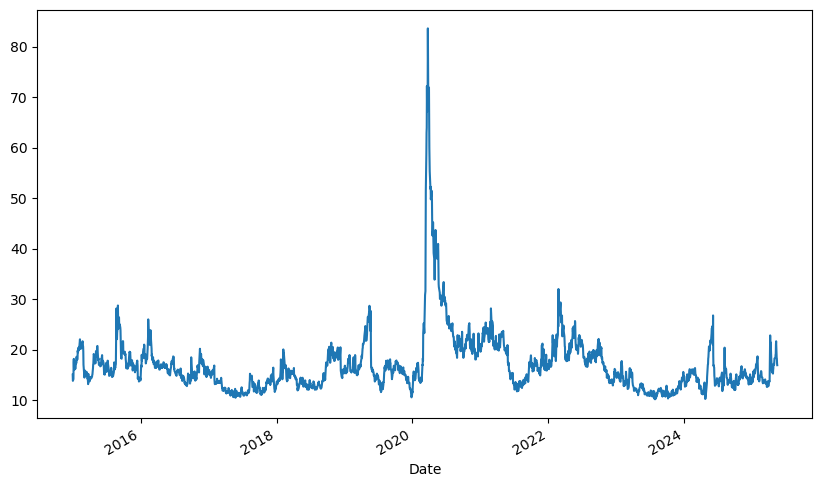

In [14]:
Vix['Close'].plot(figsize=[10,6])

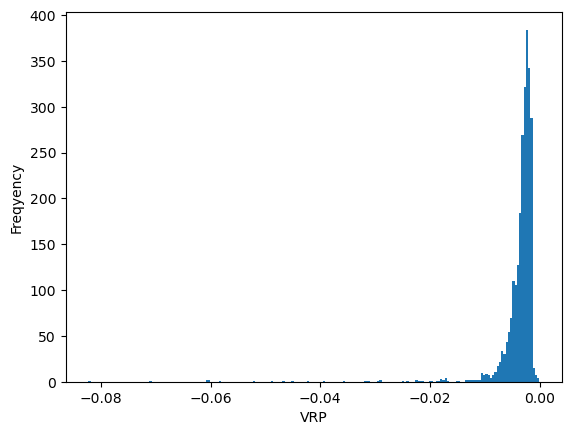

In [50]:
plt.hist(VRP,bins=200);
plt.xlabel('VRP');
plt.ylabel('Freqyency');

In [16]:
np.mean(VRP),np.std(VRP),np.var(VRP)

(-0.0037636664979705183, 0.004720185162977197, 2.2280147972790068e-05)

In [17]:
VRP.max(),VRP.min()

(-6.242027441048098e-05, -0.0822705969546441)

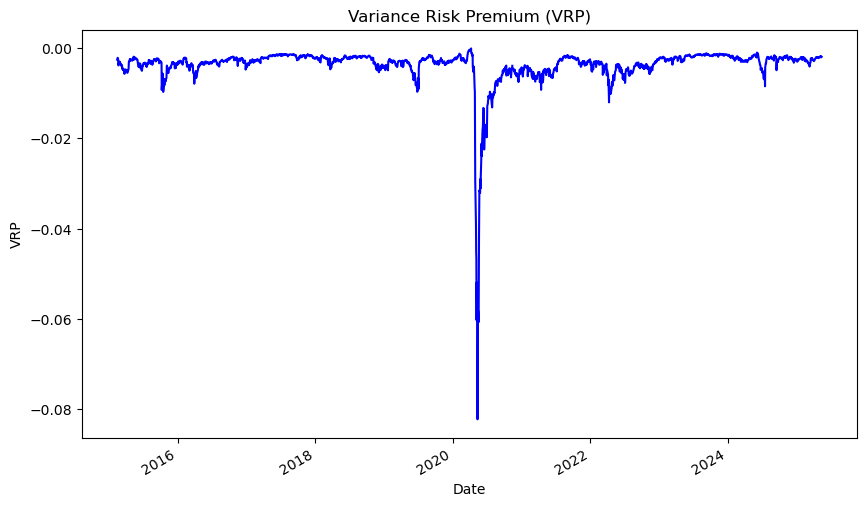

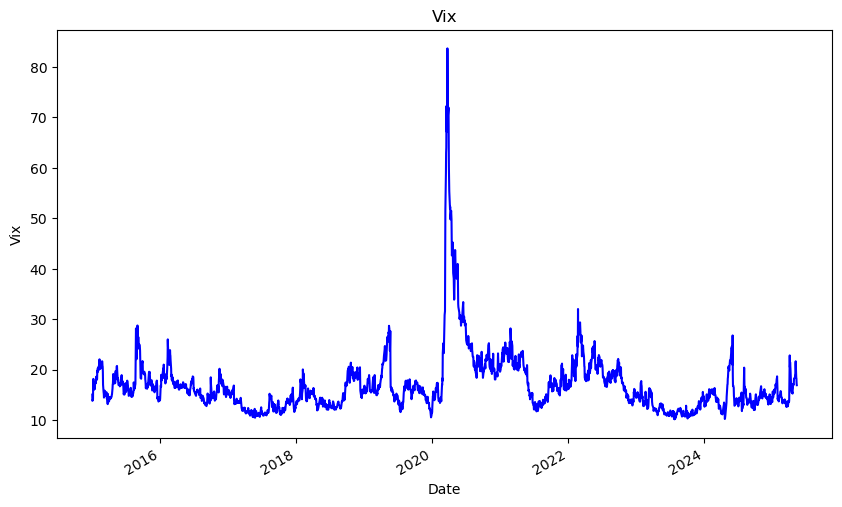

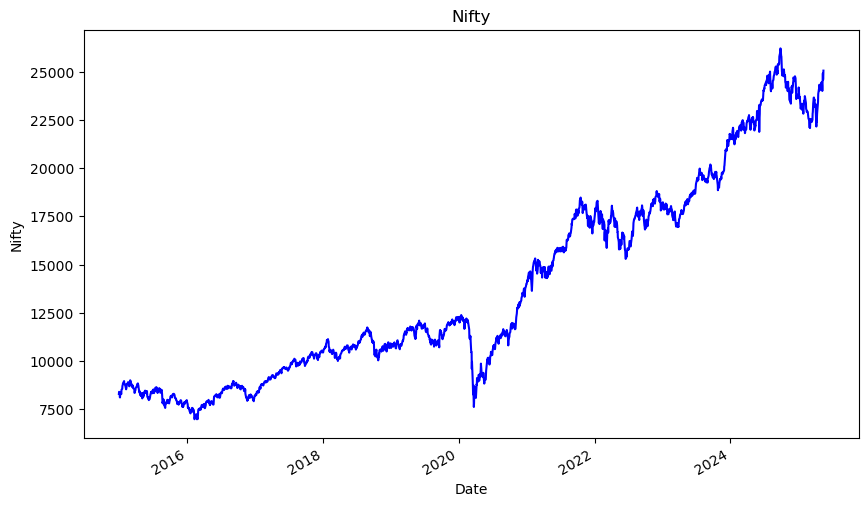

In [21]:

VRP.plot(title="Variance Risk Premium (VRP)", figsize=(10,6), color='blue')
plt.ylabel("VRP")
plt.show()

# Subplot 1: VRP
Vix['Close'].plot(title="Vix", figsize=(10, 6), color='blue')
plt.ylabel("Vix")
plt.show()

Nifty['Close'].plot(title="Nifty", figsize=(10, 6), color='blue')
plt.ylabel("Nifty")
plt.show()


## 4. Backtest Strategy Based on VRP Regimes

### Backtest 1 — Short Only (When VRP < Threshold)

In this version, I tested the idea of shorting the index when VRP is significantly negative, i.e., when options are overpriced due to fear. This version didn't perform very well.


In [133]:
def backtest(vrp,price,threshold):
    vrp_signal=pd.Series(np.where(vrp < threshold, -1, 0), index=vrp.index)
    return price.pct_change()*vrp_signal.shift(1)

In [134]:
rets=backtest(VRP,Nifty['Close'],-0.03)

Text(0.5, 1.0, 'backetest short only')

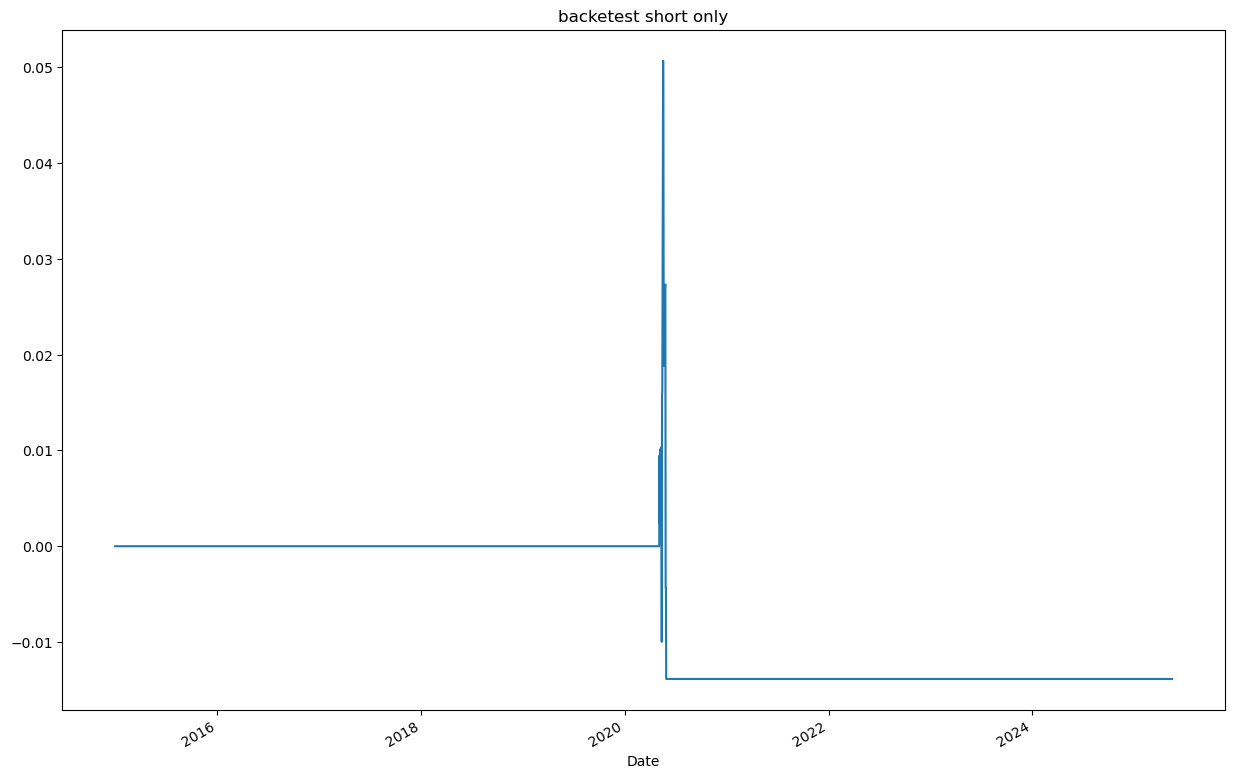

In [135]:
rets.cumsum().plot(figsize=[15,10])
plt.title(label='backetest short only')

### Backtest 2 — Long and Short Regime Strategy

This version goes long when VRP is less negative (suggesting underpricing or calm regime) and short when VRP is highly negative (fear/panic). This showed more reasonable behavior and was further analyzed.

In [31]:
def backtest2(vrp,price,threshold1,threshold2):
    vrp_signal2=pd.Series(np.where(vrp < threshold1, -1, np.where(vrp>threshold2,1,0)), index=vrp.index)
    return price.pct_change()*vrp_signal2.shift(1)

In [32]:
x=pd.Series(data=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,6])
y=pd.Series(data=[-0.02,-0.03,-0.06,-0.08,-0.01,-0.02,-0.01,-0.05,-0.01,-0.03])
rets4=backtest2(y,x,-0.05,-0.02)
rets4

0         NaN
1    0.000000
2    0.000000
3   -0.333333
4   -0.250000
5    0.200000
6    0.000000
7    0.142857
8    0.000000
9    0.333333
dtype: float64

In [35]:
rets=backtest2(VRP,Nifty['Close'],-0.005,-0.002)
rets_nifty=Nifty['Close'].pct_change().shift(1)

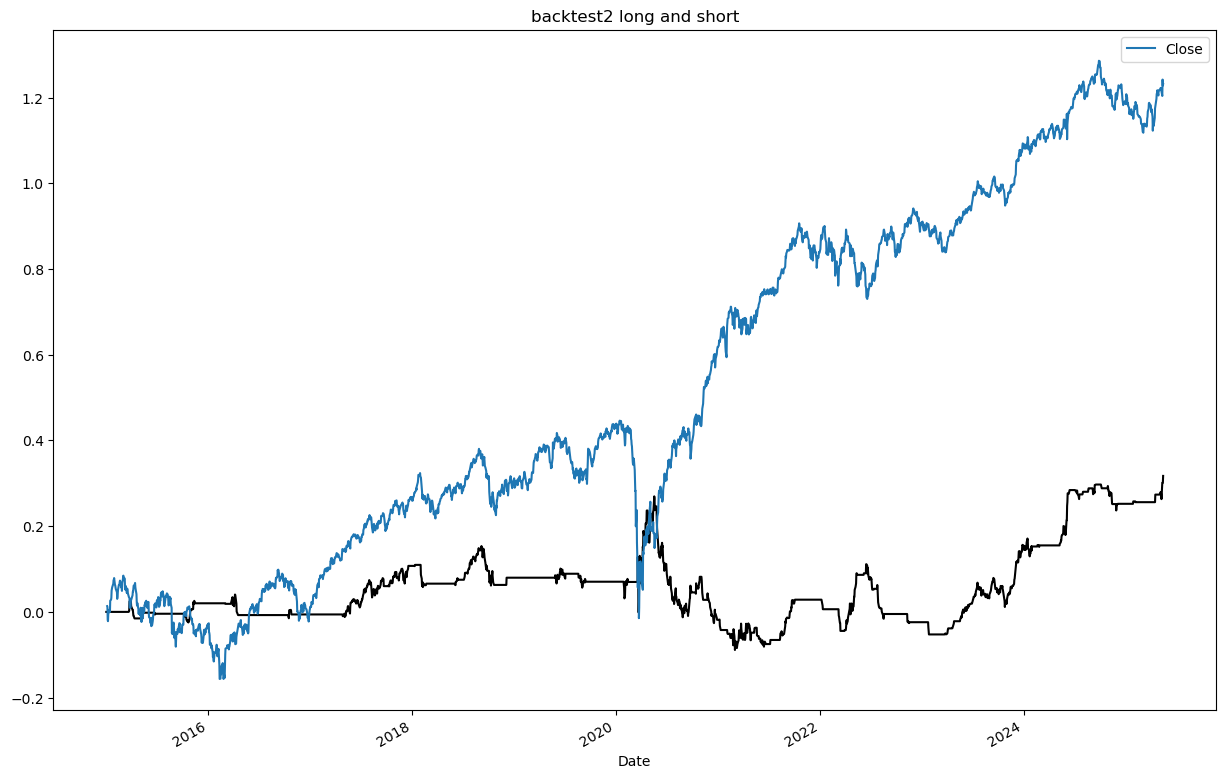

In [36]:
rets.cumsum().plot(figsize=[15,10],color='k')
plt.title(label='backtest2 long and short')
rets_nifty.cumsum().plot(figsize=[15,10])
plt.legend()

## 5. Monte Carlo Simulation and Sharpe Ratio

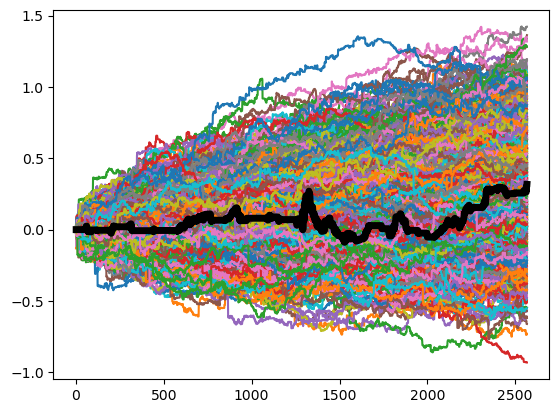

In [37]:
final=[]
for i in range(1500):
    k=np.random.choice(rets.fillna(0),len(rets))
    plt.plot(np.cumsum(k))
    final.append(np.sum(k))
plt.plot(np.cumsum(rets).values,linewidth=5,color='k')

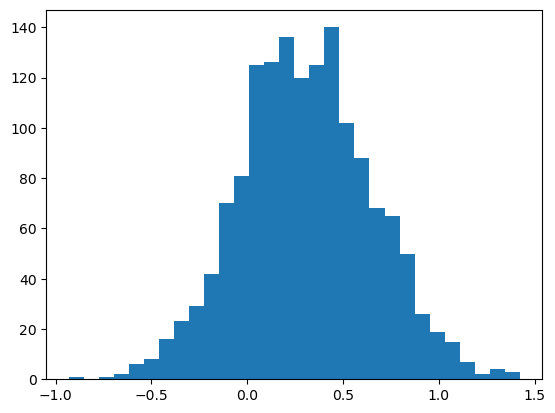

In [38]:
plt.hist(final,30);

In [39]:
Sharpe=np.mean(rets)/np.std(rets)*np.sqrt(252)
Sharpe

0.28834010828778456

## 📌 Conclusion

While Variance Risk Premium (VRP) is a useful signal for understanding fear and implied volatility mispricing, it didn’t produce strong standalone returns when applied directly to the NIFTY index.

I explored:
- A short-only regime strategy based on extreme negative VRP values.
- A long-short approach using upper and lower VRP thresholds.

The long-short version performed better and showed some robustness across time.

That said, VRP may be more effective when applied to **option strategies** or **combined with other market indicators** rather than used standalone on the underlying.

For a deeper explanation, see my full write-up on Medium.


## Miscellaneous


In [42]:
signal = pd.Series(np.where(VRP < -0.005, -1, np.where(VRP > -0.002, 1, 0)), index=VRP.index)

In [43]:
signal.value_counts()

 0    1647
 1     544
-1     377
Name: count, dtype: int64

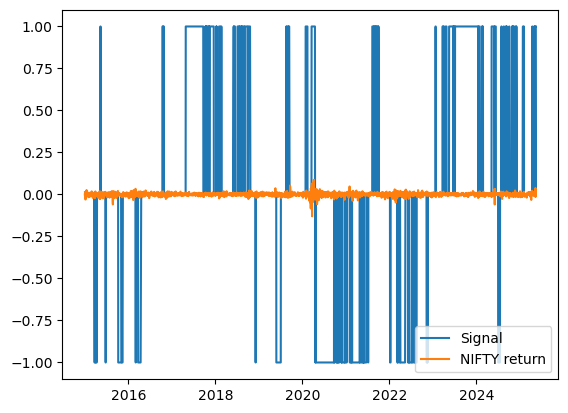

In [44]:
plt.plot(signal, label='Signal')
plt.plot(Nifty['Close'].pct_change().rolling(1).mean(), label='NIFTY return')
plt.legend()

In [45]:
VRP.corr(Nifty['Close'].pct_change().rolling(30).mean())

-0.24602297260356254

In [46]:
rolling_low = VRP.rolling(window=252).quantile(0.30)
rolling_high = VRP.rolling(window=252).quantile(0.70)

In [47]:
signal = pd.Series(np.where(VRP < rolling_low, -1, np.where(VRP > rolling_high, 1, 0)))
signal.value_counts()

 0    1411
 1     628
-1     529
Name: count, dtype: int64

In [48]:
# backtest2(vrp,price,threshold1,threshold2)
rets3=backtest2(VRP,Nifty['Close'],rolling_low,rolling_high)

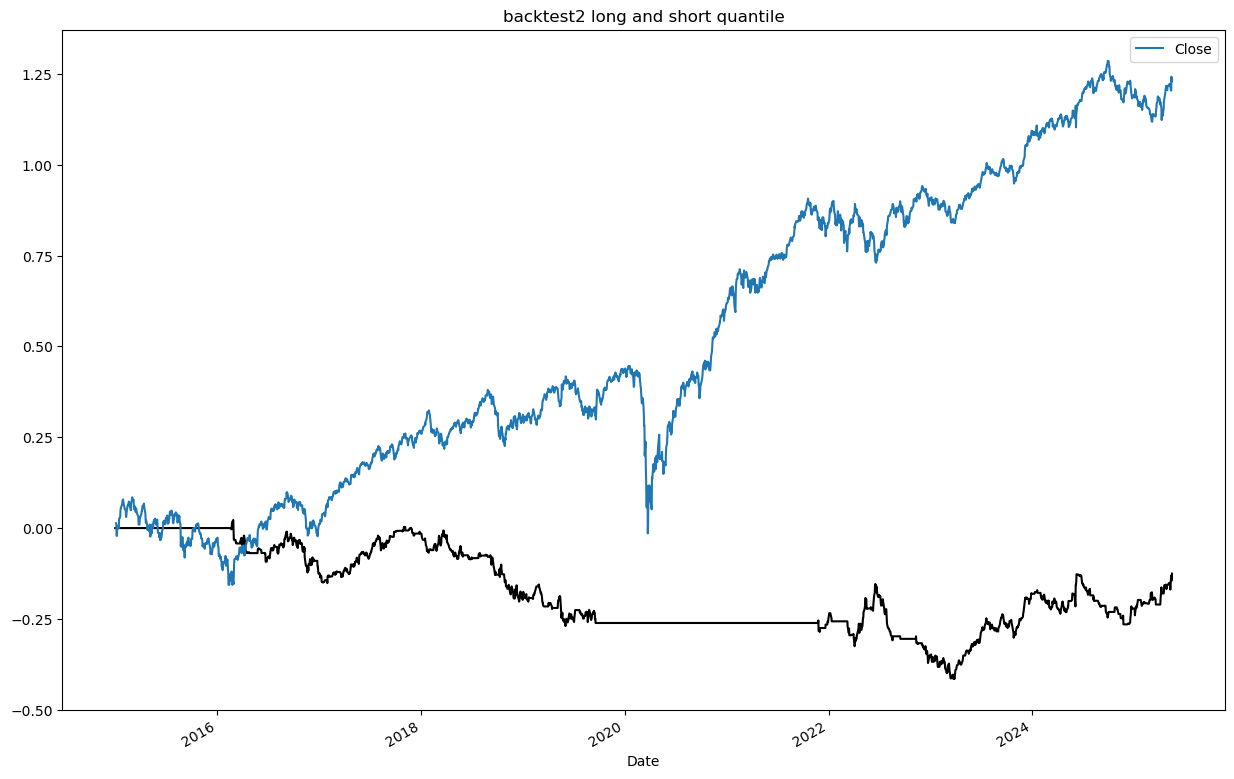

In [49]:
rets3.cumsum().plot(figsize=[15,10],color='k')
plt.title(label='backtest2 long and short quantile')
rets_nifty.cumsum().plot(figsize=[15,10])
plt.legend()

In [29]:
signal = pd.Series(np.where(VRP < -0.005, -1, np.where(VRP > -0.002, 1, 0)), index=VRP.index)
signal.value_counts()

 0    1647
 1     544
-1     377
Name: count, dtype: int64

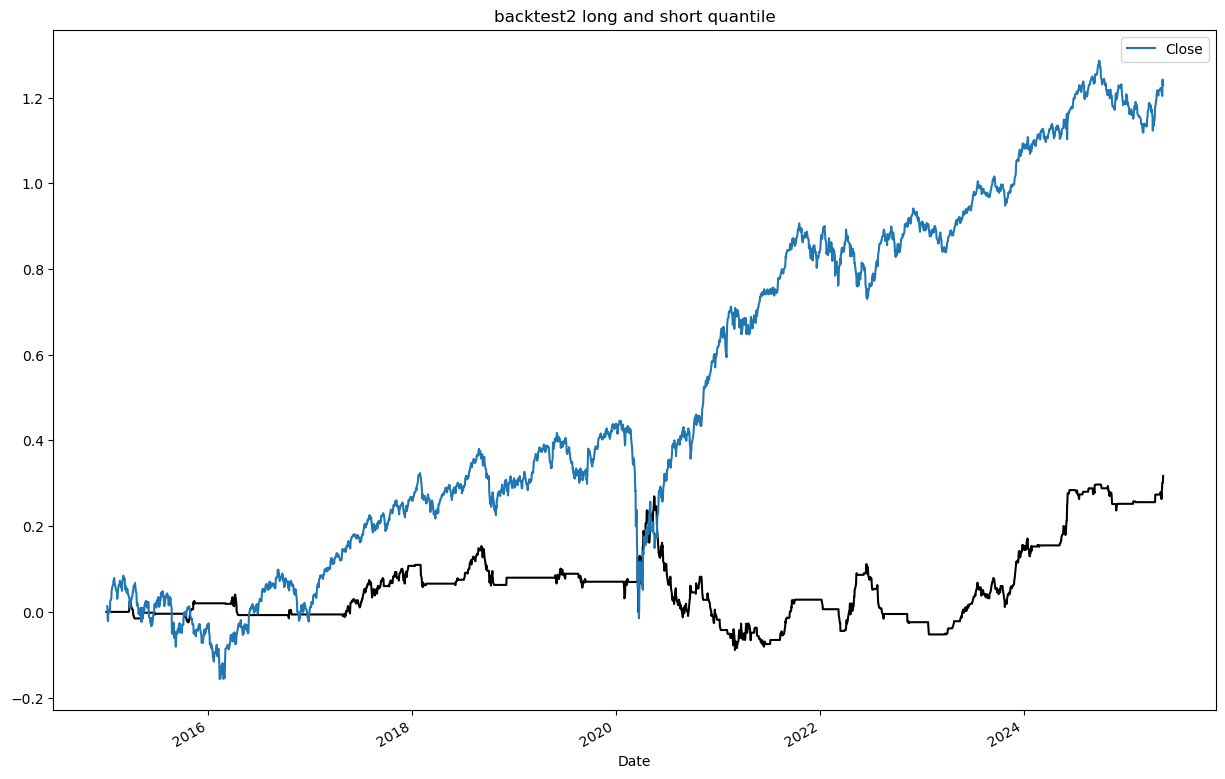

In [53]:
rets3=backtest2(VRP,Nifty['Close'],-0.005,-0.002)
rets3.cumsum().plot(figsize=[15,10],color='k')
plt.title(label='backtest2 long and short quantile')
rets_nifty.cumsum().plot(figsize=[15,10])
plt.legend()